Name: Yue Gao
Email: yug095@eng.ucsd.edu
PID: A53101273

In [1]:
%pylab inline
data_dir = "../Data/Weather/"

Populating the interactive namespace from numpy and matplotlib


In [2]:
!curl -o $data_dir/STAT.pickle http://mas-dse-open.s3.amazonaws.com/Weather/STAT.pickle

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 77.8M  100 77.8M    0     0  2520k      0  0:00:31  0:00:31 --:--:-- 1698k


In [3]:
import pickle
STAT,STAT_description=pickle.load(open(data_dir+'/STAT.pickle','r'))

In [4]:
def YearlyPlots(T,ttl='',yl='',xl='',y=None,x=None,size=(10,7), c=None):
    yearday=[i for i in range(1,366)]
    fig=figure(1,figsize=size,dpi=300)
    if shape(T)[0] != 365:
        raise ValueError("First dimension of T should be 365. Shape(T)="+str(shape(T)))
    if c is not None:
        plot_date(yearday,T, '-',color=c);
    else:
        plot_date(yearday,T, '-', );
    # rotate and align the tick labels so they look better
    #fig.autofmt_xdate()
    ylabel(yl)
    xlabel(xl)
    if y is not None:
        ylim(y)
    if x is not None:
        xlim(x)
    grid()
    title(ttl)

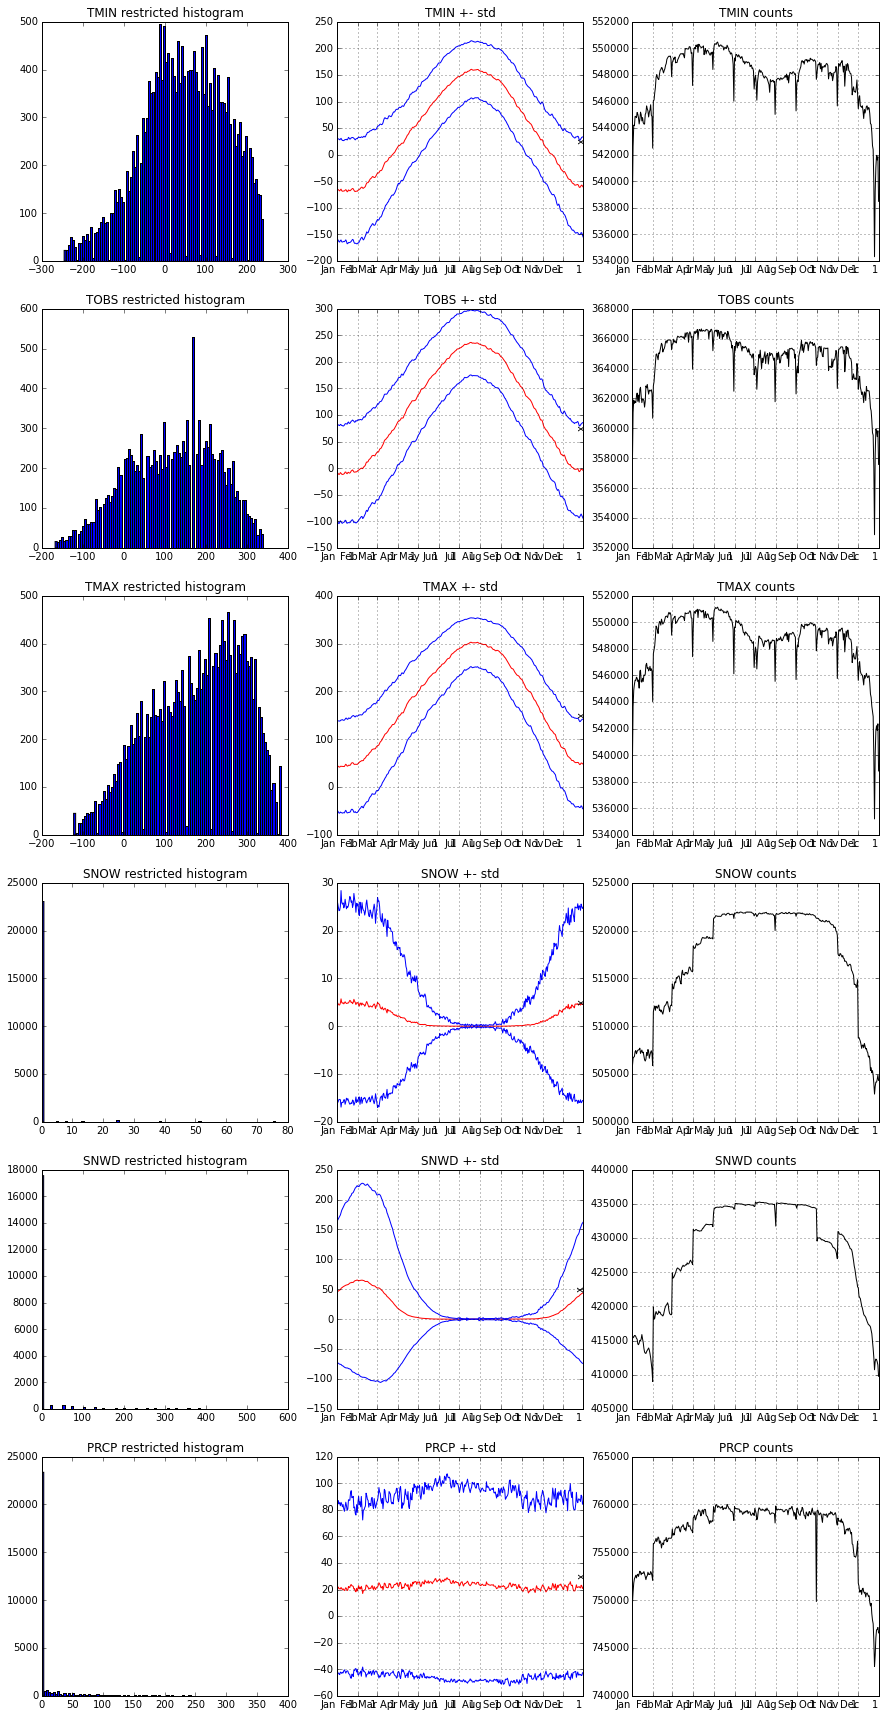

In [5]:
figure(figsize=(15,30))
offset=1
for meas in STAT.keys():
    subplot(6,3,offset)
    offset+=1
    
    sort=STAT[meas]['SortedVals']
#     bins = numpy.linspace(STAT[meas]['low100'], STAT[meas]['high100'], 100)
    hist(sort[(sort>=STAT[meas]['low100']) & (sort<=STAT[meas]['high100'])],bins=100);
    title(meas+' restricted histogram')
    ## Your code for Histogram
    subplot(6,3,offset)
    offset+=1
    
    hh=[STAT[meas]['Mean'],STAT[meas]['Mean']+sqrt(STAT[meas]['Var']),STAT[meas]['Mean']-sqrt(STAT[meas]['Var'])]
    t=np.array(zip(*hh))
    YearlyPlots(t[:,0],meas+' +- std',c='r')
    YearlyPlots(t[:,1],meas+' +- std',c='b')
    YearlyPlots(t[:,2],meas+' +- std',c='b')
    ## Your code for mean and mean +- std
    subplot(6,3,offset)
    offset+=1
    ## Your code for number of measurements
    count=STAT[meas]['NE']
    YearlyPlots(count,meas+' counts','x',c='k')

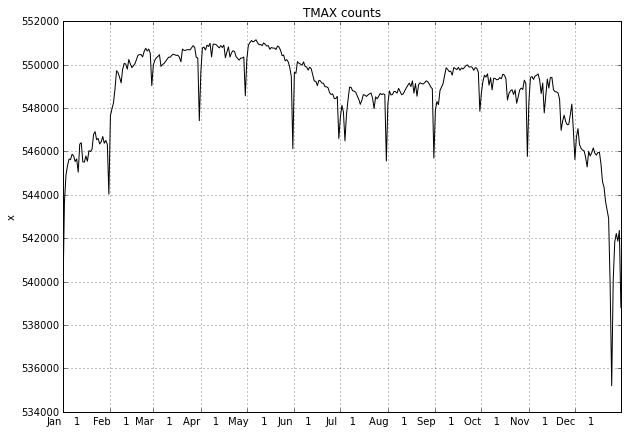

In [6]:
count=STAT['TMAX']['NE']
YearlyPlots(count,'TMAX counts','x',c='k')

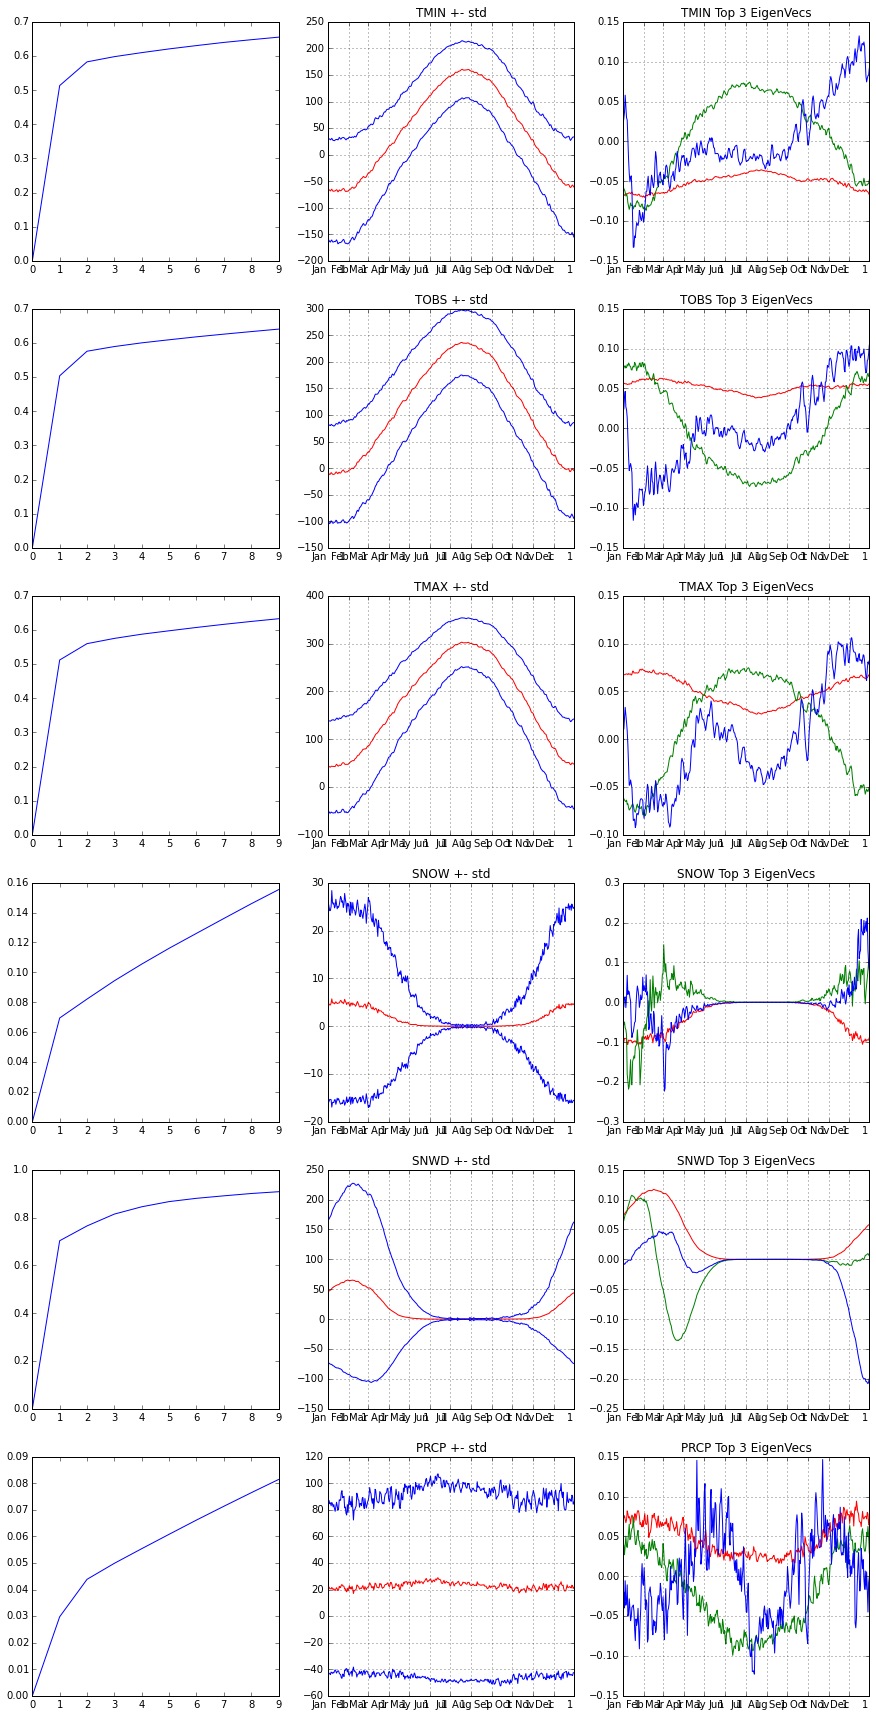

In [7]:
figure(figsize=(15,30))
offset=1
for meas in STAT.keys():
    subplot(6,3,offset)
    offset+=1
    s=STAT[meas]['eigval'].sum()
    x=range(0,10)
    y=[0]
    tosum=0
    for i in range(0,9):
        tosum+=STAT[meas]['eigval'][i]
        y.append(tosum)
    plot(x,y/s)
    ## Your code for percentage of variance explained
    subplot(6,3,offset)
    offset+=1
    hh=[STAT[meas]['Mean'],STAT[meas]['Mean']+sqrt(STAT[meas]['Var']),STAT[meas]['Mean']-sqrt(STAT[meas]['Var'])]
    t=np.array(zip(*hh))
    YearlyPlots(t[:,0],meas+' +- std',c='r')
    YearlyPlots(t[:,1],meas+' +- std',c='b')
    YearlyPlots(t[:,2],meas+' +- std',c='b')
    ## Your code for mean and mean +- std
    subplot(6,3,offset)
    offset+=1
    eiv=STAT[meas]['eigvec'][:,:3]
    YearlyPlots(eiv[:,0],meas+' Top 3 EigenVecs',c='r')
    YearlyPlots(eiv[:,1],meas+' Top 3 EigenVecs',c='g')
    YearlyPlots(eiv[:,2],meas+' Top 3 EigenVecs',c='b')
    ## Your code for top-3 eigenvectors